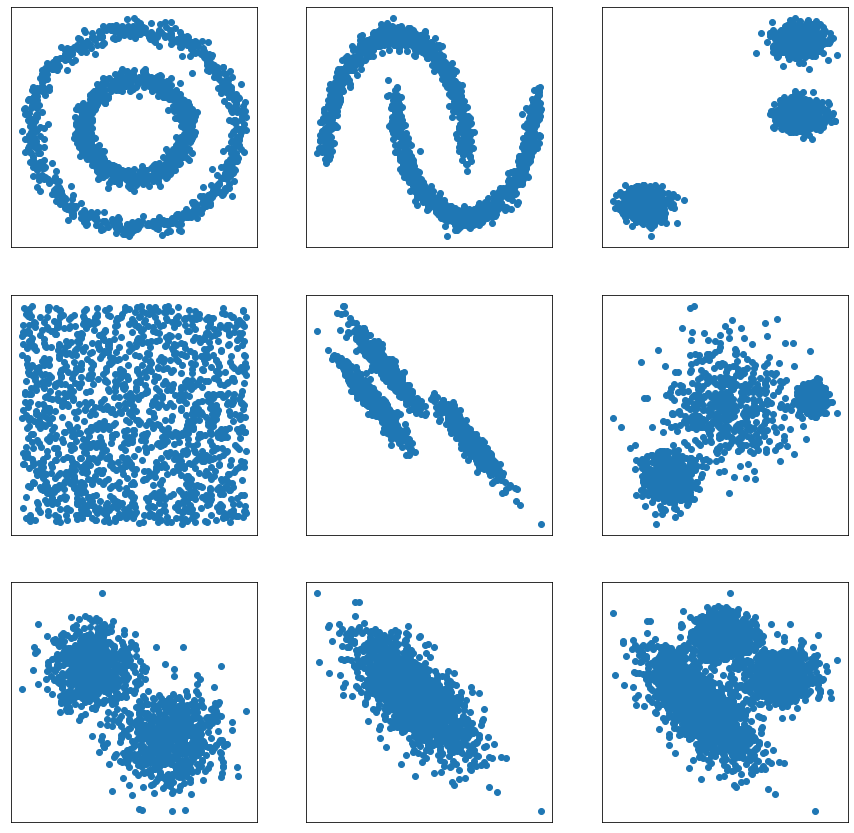

In [1]:
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 15, 15
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

# Количество объектов в каждом датасете
n_samples = 1500

# Вписанные круги
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05)

# Полукруги
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)

# Кластеры в форме круга
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)

# Отсутствие кластерной структуры
no_structure = np.random.rand(n_samples, 2), np.zeros(n_samples)

# Кластеры лентовидной формы
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = X_aniso, y

# Кластеры в форме кругов с различной дисперсией
varied = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)

# Кластеры в форме объединения 2-х кругов и одной ленты
two_blobs = datasets.make_blobs(n_samples=n_samples, centers=2, center_box=(-7.0, 7.5),
                              cluster_std=[1.4, 1.7], random_state=42)
one_aniso, y = datasets.make_blobs(n_samples=n_samples, random_state=170, centers=[[-4, -3]], cluster_std=[1.9])
transformation = [[1.2, -0.8], [-0.4, 1.7]]
one_aniso = np.dot(one_aniso, transformation), y
two_blobs_and_one_aniso = np.concatenate((two_blobs[0], one_aniso[0])), np.concatenate((two_blobs[1], 
                                                                                        np.array([2] * len(one_aniso[0]))))

datasets_list = [noisy_circles, noisy_moons, blobs, 
                 no_structure, aniso, varied, 
                 two_blobs, one_aniso, two_blobs_and_one_aniso]#список датасетов
for i, X in enumerate(datasets_list, start=1):#визуализация
    plt.subplot(3, 3, i)
    plt.xticks([]); plt.yticks([])
    plt.scatter(X[0][:, 0], X[0][:, 1])

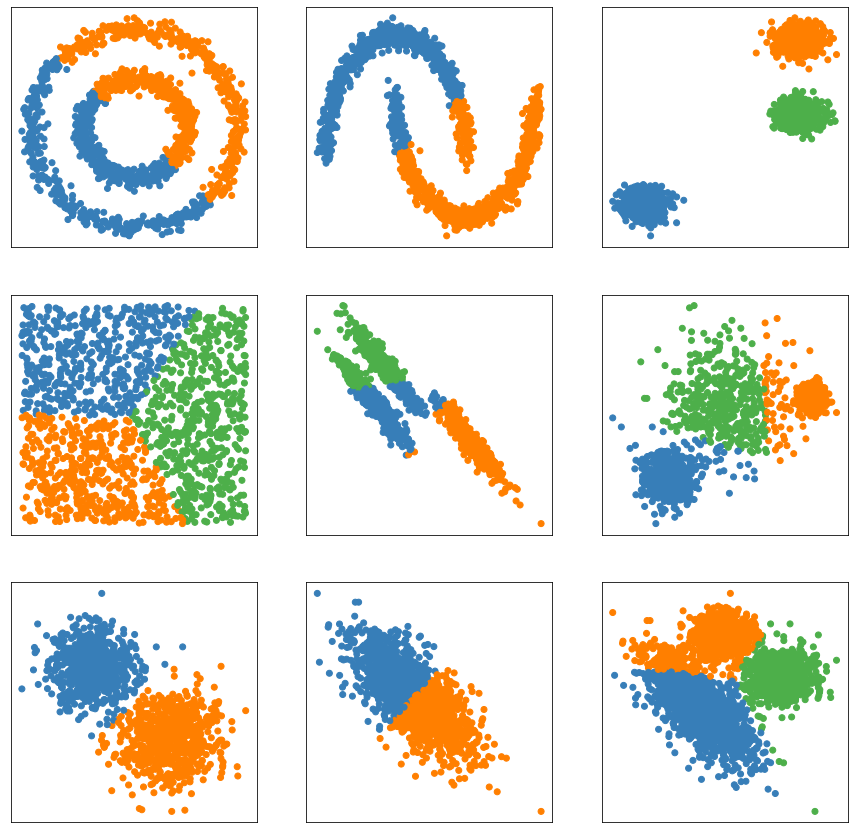

In [2]:
from sklearn.cluster import KMeans

k_means_y_pred = [];

# создаём массив пар – датасета и соответствующих для него параметров алгоритма
datasets_params_list = [
    (noisy_circles, {'n_clusters': 2}),
    (noisy_moons, {'n_clusters': 2}),
    (blobs, {'n_clusters': 3}),
    (no_structure, {'n_clusters': 3}),
    (aniso, {'n_clusters': 3}),
    (varied, {'n_clusters': 3}),
    (two_blobs, {'n_clusters': 2}),
    (one_aniso, {'n_clusters': 2}),
    (two_blobs_and_one_aniso, {'n_clusters': 3})]

#каждый датасет кластеризуем и отрисовываем
for i, (X, k_means_params) in enumerate(datasets_params_list, start=1):
    Scale = StandardScaler().fit_transform(X[0])
    
    k_means_my = KMeans(n_clusters=k_means_params['n_clusters'])
    
    k_means_my.fit(Scale)
    y_pred = k_means_my.labels_.astype(int)
    
    k_means_y_pred.append(y_pred)
    
    plt.subplot(3, 3, i)
    plt.xticks([]); plt.yticks([])
    colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                         '#f781bf', '#a65628', '#984ea3',
                                         '#999999', '#e41a1c', '#dede00']),
                                  int(max(y_pred) + 1))))
    plt.scatter(X[0][:, 0], X[0][:, 1], color=colors[y_pred])

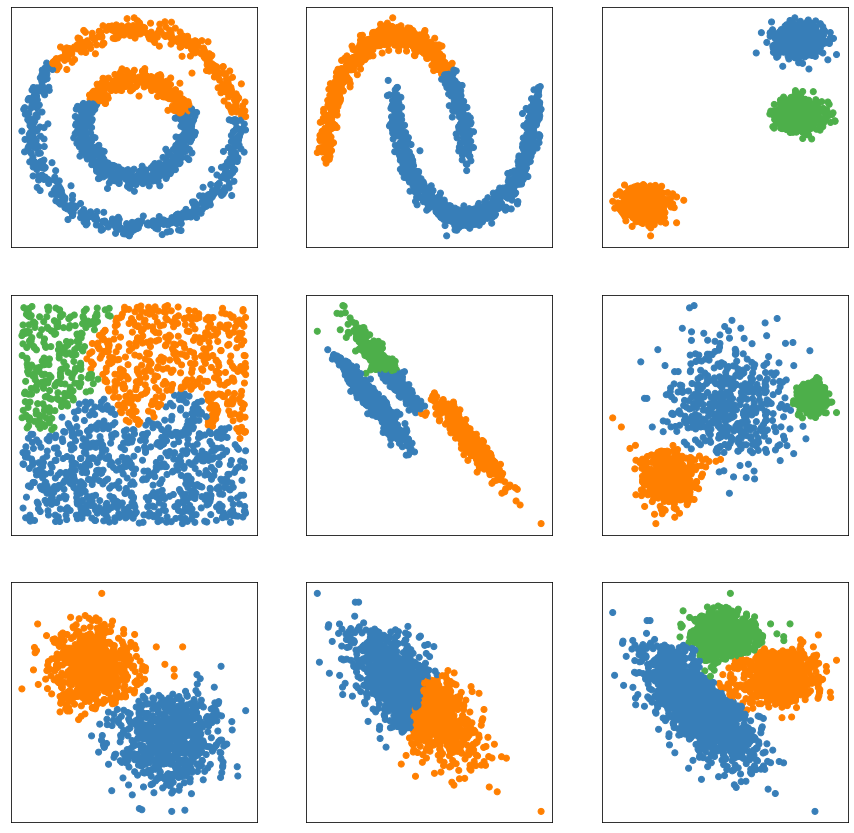

In [3]:
from sklearn.cluster import AgglomerativeClustering

ac_y_pred = [];

datasets_params_list = [
    (noisy_circles, {'n_clusters': 2}),
    (noisy_moons, {'n_clusters': 2}),
    (blobs, {'n_clusters': 3}),
    (no_structure, {'n_clusters': 3}),
    (aniso, {'n_clusters': 3}),
    (varied, {'n_clusters': 3}),
    (two_blobs, {'n_clusters': 2}),
    (one_aniso, {'n_clusters': 2}),
    (two_blobs_and_one_aniso, {'n_clusters': 3})]

for i, (X, ac_params) in enumerate(datasets_params_list, start=1):  
    Scale = StandardScaler().fit_transform(X[0])
    
    ac = AgglomerativeClustering(n_clusters=ac_params['n_clusters'], linkage='ward')
    ac.fit(Scale)
    y_pred = ac.labels_.astype(int)

    ac_y_pred.append(y_pred)
    
    plt.subplot(3, 3, i)
    plt.xticks([]); plt.yticks([])
    colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                         '#f781bf', '#a65628', '#984ea3',
                                         '#999999', '#e41a1c', '#dede00']),
                                  int(max(y_pred) + 1))))
    plt.scatter(X[0][:, 0], X[0][:, 1], color=colors[y_pred])

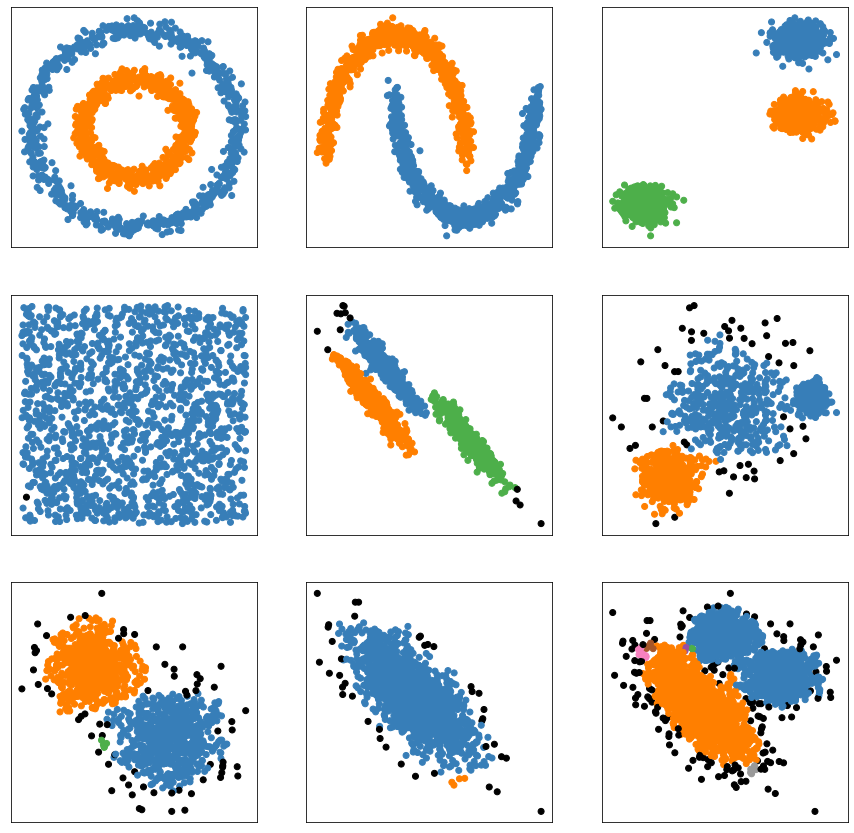

In [4]:
from sklearn.cluster import DBSCAN

dbscan_y_pred = [];

datasets_params_list = [
    (noisy_circles, {'eps': 0.3}),
    (noisy_moons, {'eps': 0.3}),
    (blobs, {'eps': 0.3}),
    (no_structure, {'eps': 0.17}),
    (aniso, {'eps': 0.184}),  
    (varied, {'eps': 0.18}),
    (two_blobs, {'eps': 0.17}),
    (one_aniso, {'eps': 0.3}),
    (two_blobs_and_one_aniso, {'eps': 0.135})]

for i, (X, dbscan_params) in enumerate(datasets_params_list, start=1):
    Scale = StandardScaler().fit_transform(X[0])
    
    dbscan = DBSCAN(eps=dbscan_params['eps'], min_samples=5)
    
    dbscan.fit(Scale)
    y_pred = dbscan.labels_.astype(int)

    dbscan_y_pred.append(y_pred)    
    
    plt.subplot(3, 3, i)
    plt.xticks([]); plt.yticks([])
    colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                         '#f781bf', '#a65628', '#984ea3',
                                         '#999999', '#e41a1c', '#dede00']),
                                  int(max(y_pred) + 1))))
    # чёрным цветом отметим выбросы
    colors = np.append(colors, ["#000000"])
    plt.scatter(X[0][:, 0], X[0][:, 1], color=colors[y_pred])

In [5]:
from sklearn.metrics import silhouette_score

for i, X in enumerate(datasets_list):
    print('Коэффициент силуэта для ', chr(i + ord('а')), '-го набора данных:', sep='')
    
    a=silhouette_score(X=X[0], labels=k_means_y_pred[i], metric='euclidean')
    print('\t-для алгоритма KMeans равен\t\t\t\t', a, sep='')
    
    a=silhouette_score(X=X[0], labels=ac_y_pred[i], metric='euclidean')
    print('\t-для алгоритма агломеративной кластеризации равен\t', a, sep='')
    
    a=silhouette_score(X=X[0], labels=dbscan_y_pred[i], metric='euclidean')
    print('\t-для алгоритма DBSCAN равен\t\t\t\t', a, sep='')

Коэффициент силуэта для а-го набора данных:
	-для алгоритма KMeans равен				0.35365974000459466
	-для алгоритма агломеративной кластеризации равен	0.3230343615485682
	-для алгоритма DBSCAN равен				0.11397816414100963
Коэффициент силуэта для б-го набора данных:
	-для алгоритма KMeans равен				0.47094206825867163
	-для алгоритма агломеративной кластеризации равен	0.4373686298490737
	-для алгоритма DBSCAN равен				0.33247143063895745
Коэффициент силуэта для в-го набора данных:
	-для алгоритма KMeans равен				0.8290743874701529
	-для алгоритма агломеративной кластеризации равен	0.8290743874701529
	-для алгоритма DBSCAN равен				0.8290743874701529
Коэффициент силуэта для г-го набора данных:
	-для алгоритма KMeans равен				0.3880871229820807
	-для алгоритма агломеративной кластеризации равен	0.327872572743395
	-для алгоритма DBSCAN равен				0.14286426496138094
Коэффициент силуэта для д-го набора данных:
	-для алгоритма KMeans равен				0.5079439603683398
	-для алгоритма агломеративной класте

In [6]:
from sklearn.metrics import davies_bouldin_score

for i, X in enumerate(datasets_list):
    print('Коэффициент Девиса-Болдуина для ', chr(i + ord('а')), '-го набора данных:', sep='')
    
    a=davies_bouldin_score(X=X[0], labels=k_means_y_pred[i])
    print('\t-для алгоритма KMeans равен\t\t\t\t', a, sep='')
    
    a=davies_bouldin_score(X=X[0], labels=ac_y_pred[i])
    print('\t-для алгоритма агломеративной кластеризации равен\t', a, sep='')
    
    a=davies_bouldin_score(X=X[0], labels=dbscan_y_pred[i])
    print('\t-для алгоритма DBSCAN равен\t\t\t\t', a, sep='')

Коэффициент Девиса-Болдуина для а-го набора данных:
	-для алгоритма KMeans равен				1.1845959006331057
	-для алгоритма агломеративной кластеризации равен	1.1964921207413393
	-для алгоритма DBSCAN равен				989.6898942666963
Коэффициент Девиса-Болдуина для б-го набора данных:
	-для алгоритма KMeans равен				0.8203830504487548
	-для алгоритма агломеративной кластеризации равен	0.8439722371739317
	-для алгоритма DBSCAN равен				1.1620081344348578
Коэффициент Девиса-Болдуина для в-го набора данных:
	-для алгоритма KMeans равен				0.24177016038343804
	-для алгоритма агломеративной кластеризации равен	0.24177016038343804
	-для алгоритма DBSCAN равен				0.24177016038343804
Коэффициент Девиса-Болдуина для г-го набора данных:
	-для алгоритма KMeans равен				0.845103853165592
	-для алгоритма агломеративной кластеризации равен	0.9255307915460396
	-для алгоритма DBSCAN равен				0.6363212494510312
Коэффициент Девиса-Болдуина для д-го набора данных:
	-для алгоритма KMeans равен				0.7186637808171245


In [7]:
from sklearn.metrics import calinski_harabasz_score

for i, X in enumerate(datasets_list):
    print('Коэффициент Халинского-Харабаша для ', chr(i + ord('а')), '-го набора данных:', sep='')
    
    a=calinski_harabasz_score(X=X[0], labels=k_means_y_pred[i])
    print('\t-для алгоритма KMeans равен\t\t\t\t', a, sep='')
    
    a=calinski_harabasz_score(X=X[0], labels=ac_y_pred[i])
    print('\t-для алгоритма агломеративной кластеризации равен\t', a, sep='')
    
    a=calinski_harabasz_score(X=X[0], labels=dbscan_y_pred[i])
    print('\t-для алгоритма DBSCAN равен\t\t\t\t', a, sep='')

Коэффициент Халинского-Харабаша для а-го набора данных:
	-для алгоритма KMeans равен				862.2367834243024
	-для алгоритма агломеративной кластеризации равен	735.9377564110198
	-для алгоритма DBSCAN равен				0.0013722701365677682
Коэффициент Халинского-Харабаша для б-го набора данных:
	-для алгоритма KMeans равен				1935.081668916595
	-для алгоритма агломеративной кластеризации равен	1612.852206119927
	-для алгоритма DBSCAN равен				979.4483501812448
Коэффициент Халинского-Харабаша для в-го набора данных:
	-для алгоритма KMeans равен				37203.36303934008
	-для алгоритма агломеративной кластеризации равен	37203.36303934008
	-для алгоритма DBSCAN равен				37203.36303934007
Коэффициент Халинского-Харабаша для г-го набора данных:
	-для алгоритма KMeans равен				1189.7180060365722
	-для алгоритма агломеративной кластеризации равен	924.3445527163302
	-для алгоритма DBSCAN равен				2.1780563302666933
Коэффициент Халинского-Харабаша для д-го набора данных:
	-для алгоритма KMeans равен				3781.8

In [8]:
from sklearn.metrics import homogeneity_score

for i, X in enumerate(datasets_list):
    print('Коэффициент однородности для ', chr(i + ord('а')), '-го набора данных:', sep='')
    
    a=homogeneity_score(labels_true=X[1], labels_pred=k_means_y_pred[i])
    print('\t-для алгоритма KMeans равен\t\t\t\t', a, sep='')
    
    a=homogeneity_score(labels_true=X[1], labels_pred=ac_y_pred[i])
    print('\t-для алгоритма агломеративной кластеризации равен\t', a, sep='')
    
    a=homogeneity_score(labels_true=X[1], labels_pred=dbscan_y_pred[i])
    print('\t-для алгоритма DBSCAN равен\t\t\t\t', a, sep='')

Коэффициент однородности для а-го набора данных:
	-для алгоритма KMeans равен				5.1297343607923226e-06
	-для алгоритма агломеративной кластеризации равен	0.0006683304245658186
	-для алгоритма DBSCAN равен				1.0
Коэффициент однородности для б-го набора данных:
	-для алгоритма KMeans равен				0.3869800350757354
	-для алгоритма агломеративной кластеризации равен	0.5464776145122131
	-для алгоритма DBSCAN равен				1.0
Коэффициент однородности для в-го набора данных:
	-для алгоритма KMeans равен				1.0
	-для алгоритма агломеративной кластеризации равен	1.0
	-для алгоритма DBSCAN равен				1.0
Коэффициент однородности для г-го набора данных:
	-для алгоритма KMeans равен				1.0
	-для алгоритма агломеративной кластеризации равен	1.0
	-для алгоритма DBSCAN равен				1.0
Коэффициент однородности для д-го набора данных:
	-для алгоритма KMeans равен				0.6181786703273342
	-для алгоритма агломеративной кластеризации равен	0.730886101129279
	-для алгоритма DBSCAN равен				0.9878677117232207
Коэффицие

In [9]:
from sklearn.metrics import completeness_score

for i, X in enumerate(datasets_list):
    print('Коэффициент полноты для ', chr(i + ord('а')), '-го набора данных:', sep='')
    
    a=completeness_score(labels_true=X[1], labels_pred=k_means_y_pred[i])
    print('\t-для алгоритма KMeans равен\t\t\t\t', a, sep='')
    
    a=completeness_score(labels_true=X[1], labels_pred=ac_y_pred[i])
    print('\t-для алгоритма агломеративной кластеризации равен\t', a, sep='')
    
    a=completeness_score(labels_true=X[1], labels_pred=dbscan_y_pred[i])
    print('\t-для алгоритма DBSCAN равен\t\t\t\t', a, sep='')

Коэффициент полноты для а-го набора данных:
	-для алгоритма KMeans равен				5.129839617030711e-06
	-для алгоритма агломеративной кластеризации равен	0.0007049317174839502
	-для алгоритма DBSCAN равен				1.0
Коэффициент полноты для б-го набора данных:
	-для алгоритма KMeans равен				0.38704009418886587
	-для алгоритма агломеративной кластеризации равен	0.5730115092484505
	-для алгоритма DBSCAN равен				1.0
Коэффициент полноты для в-го набора данных:
	-для алгоритма KMeans равен				1.0
	-для алгоритма агломеративной кластеризации равен	1.0
	-для алгоритма DBSCAN равен				1.0
Коэффициент полноты для г-го набора данных:
	-для алгоритма KMeans равен				5.066300912368923e-16
	-для алгоритма агломеративной кластеризации равен	2.7391942153348627e-16
	-для алгоритма DBSCAN равен				0.0
Коэффициент полноты для д-го набора данных:
	-для алгоритма KMeans равен				0.6183158774089489
	-для алгоритма агломеративной кластеризации равен	0.7675815225989412
	-для алгоритма DBSCAN равен				0.9529489855164

In [10]:
from sklearn.metrics import v_measure_score

for i, X in enumerate(datasets_list):
    print('V-мера для ', chr(i + ord('а')), '-го набора данных:', sep='')
    
    a=v_measure_score(labels_true=X[1], labels_pred=k_means_y_pred[i])
    print('\t-для алгоритма KMeans равен\t\t\t\t', a, sep='')
    
    a=v_measure_score(labels_true=X[1], labels_pred=ac_y_pred[i])
    print('\t-для алгоритма агломеративной кластеризации равен\t', a, sep='')
    
    a=v_measure_score(labels_true=X[1], labels_pred=dbscan_y_pred[i])
    print('\t-для алгоритма DBSCAN равен\t\t\t\t', a, sep='')

V-мера для а-го набора данных:
	-для алгоритма KMeans равен				5.1297869883715885e-06
	-для алгоритма агломеративной кластеризации равен	0.0006861433073990412
	-для алгоритма DBSCAN равен				1.0
V-мера для б-го набора данных:
	-для алгоритма KMeans равен				0.38701006230219515
	-для алгоритма агломеративной кластеризации равен	0.5594301114962545
	-для алгоритма DBSCAN равен				1.0
V-мера для в-го набора данных:
	-для алгоритма KMeans равен				1.0
	-для алгоритма агломеративной кластеризации равен	1.0
	-для алгоритма DBSCAN равен				1.0
V-мера для г-го набора данных:
	-для алгоритма KMeans равен				1.0132601824737842e-15
	-для алгоритма агломеративной кластеризации равен	5.478388430669724e-16
	-для алгоритма DBSCAN равен				0.0
V-мера для д-го набора данных:
	-для алгоритма KMeans равен				0.6182472662555794
	-для алгоритма агломеративной кластеризации равен	0.748784501536842
	-для алгоритма DBSCAN равен				0.970094223787309
V-мера для е-го набора данных:
	-для алгоритма KMeans равен			